In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

import glob
import os
from sklearn.model_selection import cross_val_score

import abc
import numpy as np

import pandas as pd
import abc
import re
import nltk
from sklearn import model_selection 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:

import time
import numpy as np

import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
import datetime
import missingno as mn
import pylab as plt
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [6]:
import pandas as pd
import numpy as np
import missingno as mn

In [138]:
featureDF_nw = pd.read_csv('nw_feature_woText_MSFT.csv')
featureDF_tw = pd.read_csv('tw_feature_woText_MSFT.csv')
targetDF_ = pd.read_csv('FIwithTargetwithFTT.csv')

In [139]:
def createComparableDataset(_df):
    _df.date = pd.to_datetime(_df.date)
    _df = _df[_df['date'] >= pd.to_datetime('2015/05/04')]
    _df = _df[_df['date'] <= pd.to_datetime('2019/03/28')]
    return _df

In [140]:
def prepareDataSet(_df):
    _df.date = pd.to_datetime(_df.date)
    train = _df[_df['date'] < pd.to_datetime('2019/01/01')]
    test = _df[_df['date'] >= pd.to_datetime('2019/01/01')]
    
    train, train_y = getFeaturesAndTargetRemoveDate(train)
    test, test_y = getFeaturesAndTargetRemoveDate(test)
    return train, train_y,test, test_y

In [141]:
def createTrainingAndTestingSet(_df):
    train = _df[_df['date'] < pd.to_datetime('2019/01/01')]
    test = _df[_df['date'] >= pd.to_datetime('2019/01/01')]
    return train ,test

In [142]:
def getStartEndDateShape(dfz):
    startDate = str(min(dfz['date']))
    endDate = str(max(dfz['date']))
    print('startDate', startDate)
    print('endDate', endDate)
    print('shape', dfz.shape)
    print('---------------------------')

In [143]:
def getFeaturesAndTargetRemoveDate(_df):
    try:
        train_y = _df['target']
        train = _df.drop(['date','target'],axis =1)
    except:
        train_y = _df['Target']
        train = _df.drop(['date','Target'],axis =1)        
    return train, train_y

In [144]:
getStartEndDateShape(featureDF_nw)
getStartEndDateShape(featureDF_tw)
getStartEndDateShape(targetDF_)

startDate 2004/07/21
endDate 2019/03/28
shape (4020, 24)
---------------------------
startDate 2015/05/04
endDate 2019/04/04
shape (1426, 25)
---------------------------
startDate 2003/04/30
endDate 2019/04/03
shape (4010, 32)
---------------------------


In [145]:
targtWithDateForJoin =pd.DataFrame()
targtWithDateForJoin['date'] = targetDF_.date.tolist()
targtWithDateForJoin['target'] = targetDF_.Target.tolist()

# Formulation of overall data

In [146]:
featureDF_nw.date = pd.to_datetime(featureDF_nw.date)
targtWithDateForJoin.date = pd.to_datetime(targtWithDateForJoin.date)
featureDF_tw.date = pd.to_datetime(featureDF_tw.date)
targetDF_.date = pd.to_datetime(targetDF_.date)

In [147]:
featureDF_nw= createComparableDataset(featureDF_nw)
targtWithDateForJoin=createComparableDataset(targtWithDateForJoin)
featureDF_tw=createComparableDataset(featureDF_tw)
targetDF_=createComparableDataset(targetDF_)
targetDF_.rename(columns={'Target':'target'}, inplace=True)

In [148]:
getStartEndDateShape(featureDF_nw)
getStartEndDateShape(featureDF_tw)
getStartEndDateShape(targetDF_)

startDate 2015-05-04 00:00:00
endDate 2019-03-28 00:00:00
shape (1027, 24)
---------------------------
startDate 2015-05-04 00:00:00
endDate 2019-03-28 00:00:00
shape (1419, 25)
---------------------------
startDate 2015-05-04 00:00:00
endDate 2019-03-28 00:00:00
shape (983, 32)
---------------------------


In [149]:
result =pd.merge( targetDF_,featureDF_nw, how='outer', on='date')

In [150]:
getStartEndDateShape(result)

startDate 2015-05-04 00:00:00
endDate 2019-03-28 00:00:00
shape (1171, 55)
---------------------------


In [151]:
result =pd.merge( result,featureDF_tw, how='outer', on='date')

In [152]:
getStartEndDateShape(result)

startDate 2015-05-04 00:00:00
endDate 2019-03-28 00:00:00
shape (1423, 79)
---------------------------


In [153]:
result.sort_values(by='date',inplace=True) 

In [154]:
result = result.ffill()
result.fillna(0,inplace=True)

In [155]:
result.head(5)

,Open,High,Low,Close,Adj Close,Volume,sma2,sma2_1,sma2_increment,sma2_1_increment,...,disgust_y,anticipation_y,fear_y,trust_y,tb_polarity_y,tb_subjectivity_y,hiv4_positive_y,hiv4_negative_y,hiv4_polarity_y,hiv4_subjectivity_y
0,48.369999,48.869999,48.180000,48.240002,44.072769,34039500.0,48.475001,48.640002,-0.165001,-0.069999,...,0.0,0.002845,0.0,0.000000,2.400000,2.383333,5.0,2.0,2.333331,0.589387
1,47.820000,48.160000,47.310001,47.599998,43.488049,50369200.0,48.095000,48.475001,-0.380001,-0.165001,...,0.0,0.003759,0.0,0.000000,0.000000,0.300000,3.0,2.0,0.666666,0.326007
2,47.570000,47.770000,46.020000,46.279999,42.282074,52433000.0,47.695000,48.095000,-0.400000,-0.380001,...,0.0,0.000522,0.0,0.000000,1.250947,7.171212,19.0,5.0,7.999995,3.123412
3,46.270000,47.090000,46.160000,46.700001,42.665791,32971700.0,46.920000,47.695000,-0.775000,-0.400000,...,0.0,0.000573,0.0,0.000573,0.322159,3.534091,2.0,7.0,-3.999997,1.258474
4,47.549999,47.980000,47.520000,47.750000,43.625092,35364900.0,46.909999,46.920000,-0.010001,-0.775000,...,0.0,0.000548,0.0,0.000000,0.325000,0.962500,11.0,6.0,2.333332,1.455759


In [156]:
result.tail(5)

,Open,High,Low,Close,Adj Close,Volume,sma2,sma2_1,sma2_increment,sma2_1_increment,...,disgust_y,anticipation_y,fear_y,trust_y,tb_polarity_y,tb_subjectivity_y,hiv4_positive_y,hiv4_negative_y,hiv4_polarity_y,hiv4_subjectivity_y
1092,119.500000,119.589996,117.040001,117.050003,117.050003,33624500.0,118.319999,117.264999,1.055001,-0.474998,...,12.0,0.001662,0.000345,0.001552,54.011847,133.276238,565.0,273.0,99.701533,75.265758
979,116.559998,118.010002,116.320000,117.660004,117.660004,27067100.0,118.029999,118.319999,-0.290000,1.055001,...,4.0,0.001268,0.000215,0.000933,21.654621,77.138890,361.0,156.0,62.624211,41.045214
980,118.620003,118.709999,116.849998,117.910004,117.910004,26097700.0,117.590000,118.029999,-0.439999,-0.290000,...,19.0,0.001762,0.000370,0.001193,98.739210,286.580670,1363.0,625.0,248.350599,147.048014
981,117.879997,118.209999,115.519997,116.769997,116.769997,22733400.0,118.250000,117.590000,0.659999,-0.439999,...,17.0,0.001513,0.000332,0.001175,110.125758,283.081651,1428.0,565.0,244.546184,132.279292
982,117.440002,117.580002,116.129997,116.930000,116.930000,18334800.0,117.659999,118.250000,-0.590001,0.659999,...,27.0,0.001972,0.000315,0.001134,101.462943,299.296855,1406.0,590.0,267.852539,148.186288


In [157]:
# Save data with without scaling
result.to_csv('OverAllDataset_wo_scaling.csv',index= False)

In [158]:
getStartEndDateShape(result)

startDate 2015-05-04 00:00:00
endDate 2019-03-28 00:00:00
shape (1423, 79)
---------------------------


In [159]:
date= result.date.tolist()
target = result.target.tolist()
result.drop(['date','target'],axis =1,inplace=True)

In [160]:
scale = StandardScaler()
result = pd.DataFrame(scale.fit_transform(result.values), columns=result.columns, index=result.index)

In [161]:
result['date'] = date
result['Target'] = target

In [162]:
# Save data with without scaling                   
result.to_csv('OverAllDataset_with_scaling.csv',index= False)


In [163]:
getStartEndDateShape(result)

startDate 2015-05-04 00:00:00
endDate 2019-03-28 00:00:00
shape (1423, 79)
---------------------------


# Training and Test Split

In [164]:
train,test = createTrainingAndTestingSet(result)

In [165]:
getStartEndDateShape(train)
getStartEndDateShape(test)

startDate 2015-05-04 00:00:00
endDate 2018-12-31 00:00:00
shape (1336, 79)
---------------------------
startDate 2019-01-01 00:00:00
endDate 2019-03-28 00:00:00
shape (87, 79)
---------------------------


In [166]:
train.to_csv('train_tw_nw_fi.csv',index=False)
test.to_csv('test_tw_nw_fi.csv',index=False)

In [167]:
nonScaledDataset = pd.read_csv('OverAllDataset_wo_scaling.csv')
nonScaledDataset.date = pd.to_datetime(nonScaledDataset.date)

In [168]:
train_en, test_en = createTrainingAndTestingSet(nonScaledDataset)

In [169]:
getStartEndDateShape(train_en)
getStartEndDateShape(test_en)

startDate 2015-05-04 00:00:00
endDate 2018-12-31 00:00:00
shape (1336, 79)
---------------------------
startDate 2019-01-01 00:00:00
endDate 2019-03-28 00:00:00
shape (87, 79)
---------------------------


In [170]:
train_en.to_csv('train_ns_tw_nw_fi.csv',index= False)
test_en.to_csv('test_ns_tw_nw_fi.csv',index= False)

# NEWS RandomForest- NonScaled

In [200]:
featureDF_nw.date = pd.to_datetime(featureDF_nw.date)
targtWithDateForJoin.date = pd.to_datetime(targtWithDateForJoin.date)
result =pd.merge(featureDF_nw, targtWithDateForJoin, how='left', on='date')

In [201]:
result.sort_values(by='date',inplace=True) 

In [202]:
result['target'] = result['target'].ffill()

In [203]:
_ens_News_NonScaled_FE = result

In [204]:
#train and test split
train_nw, test_nw = createTrainingAndTestingSet(result)

train_nw_y = train_nw['target']
test_nw_y = test_nw['target']


In [205]:
getStartEndDateShape(train_nw)
getStartEndDateShape(test_nw)

startDate 2015-05-04 00:00:00
endDate 2018-12-30 00:00:00
shape (961, 25)
---------------------------
startDate 2019-01-03 00:00:00
endDate 2019-03-28 00:00:00
shape (66, 25)
---------------------------


In [206]:

train_nw.drop(['date','target'],axis=1,inplace=True)
test_nw.drop(['date','target'],axis=1,inplace=True)

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [207]:
print('train_nw',train_nw.shape,'test_nw',test_nw.shape,'len(train_nw_y)',len(train_nw_y),'len(test_nw_y)',len(test_nw_y))

train_nw (961, 23) test_nw (66, 23) len(train_nw_y) 961 len(test_nw_y) 66


In [208]:
# Naive Bayes for Baseline
from sklearn.naive_bayes import GaussianNB
def NaiveBayes(train_features , train_labels, test_features,test_labels):
    gnb = GaussianNB()
    y_pred = gnb.fit(train_features, train_labels).predict(test_features)
    print('accuracy_score',accuracy_score(y_pred, test_labels))
    print('classification_score\n',classification_report(y_pred, test_labels))
    return gnb
    

In [209]:
def plotImportanceOfFeature(features,clf):
    importances = clf.feature_importances_
    indices = np.argsort(importances)

    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

In [210]:
def corelationPlot (df_):
    corr = df_.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(df_.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(df_.columns)
    ax.set_yticklabels(df_.columns)
    plt.show()

In [211]:
def vif_RemoveHiglyCorelatedFeatures(_df,_dfTest,corPlot = False):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(_df.values, i) for i in range(_df.values.shape[1])]
    vif.round(1)
    while max(vif["VIF Factor"])>10:
        vif = pd.DataFrame()
        vif["VIF Factor"] = [variance_inflation_factor(_df.values, i) for i in range(_df.values.shape[1])]
        vif.round(1)
        dropCol = [_df.columns[np.argmax(vif["VIF Factor"])]]
        _df.drop(columns=dropCol, inplace=True)
        _dfTest.drop(columns=dropCol, inplace=True)
        if corPlot:
            corelationPlot (_df)

In [212]:
def cCMatrixAccRF(train_features , train_labels, test_features,test_labels, features, dispImpOfFeature = False):
#         train_features, test_features, train_labels, test_labels= model_selection.train_test_split( featureDF , targetValue, test_size=0.1, random_state=0)

        rf_model =RandomForestClassifier(n_estimators=5000, max_depth=4,random_state=0)
        rf_model.fit(train_features, train_labels)
        y_predicted=rf_model.predict(test_features)
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++' )
        
        if dispImpOfFeature:
            plotImportanceOfFeature(features, rf_model)
        print('confusion_matrix',confusion_matrix(y_true=test_labels, y_pred=y_predicted))
        print('number of datapoints in Up Class', test_labels.value_counts()[1])
        print('number of datapoints in Down Class', test_labels.value_counts()[0])
        print('accuracy_score',accuracy_score(y_predicted, test_labels))
        print('classification_score\n',classification_report(y_predicted, test_labels))
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        return rf_model
#         return rf_model.predict(train_features),rf_model.predict(test_features)

In [213]:
vif_RemoveHiglyCorelatedFeatures(train_nw,test_nw)

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


In [185]:
print('train_nw',train_nw.shape,'test_nw',test_nw.shape,'len(train_nw_y)',len(train_nw_y),'len(test_nw_y)',len(test_nw_y))

train_nw (961, 16) test_nw (66, 16) len(train_nw_y) 961 len(test_nw_y) 66


In [186]:
train_nw.columns

Index(['lm_positive', 'lm_negative', 'lm_polarity', 'passive', 'weak',
       'strong', 'anger', 'joy', 'suprise', 'sadness', 'disgust',
       'anticipation', 'fear', 'trust', 'tb_polarity', 'hiv4_polarity'],
      dtype='object')

In [130]:
news_model = NaiveBayes(train_nw , train_nw_y, test_nw,test_nw_y)

accuracy_score 0.6212121212121212
classification_score
               precision    recall  f1-score   support

         0.0       0.28      0.67      0.39        12
         1.0       0.89      0.61      0.73        54

   micro avg       0.62      0.62      0.62        66
   macro avg       0.58      0.64      0.56        66
weighted avg       0.78      0.62      0.66        66



In [255]:
# save the model to disk
filename = 'news_model.sav'
pickle.dump(news_model, open(filename, 'wb'))

# Financial Indicator RandomForest- Scaled

In [199]:
_ens_FI_Scaled_FE =fi_df_copy = targetDF_.copy()

In [188]:
train_fi, test_fi= createTrainingAndTestingSet(fi_df_copy)

train_fi_y = train_fi['target']
test_fi_y = test_fi['target']

getStartEndDateShape(train_fi)
getStartEndDateShape(test_fi)

train_fi.drop(['date','target'],axis=1,inplace=True)
test_fi.drop(['date','target'],axis=1,inplace=True)

startDate 2015-05-04 00:00:00
endDate 2018-12-31 00:00:00
shape (923, 32)
---------------------------
startDate 2019-01-02 00:00:00
endDate 2019-03-28 00:00:00
shape (60, 32)
---------------------------


C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [189]:
print('train_fi',train_fi.shape,'test_fi',test_fi.shape,'len(train_fi_y)',len(train_fi_y),'len(test_fi_y)',len(test_fi_y))

train_fi (923, 30) test_fi (60, 30) len(train_fi_y) 923 len(test_fi_y) 60


In [190]:
vif_RemoveHiglyCorelatedFeatures(train_fi,test_fi)

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


In [191]:
scale = StandardScaler()
train_fi = pd.DataFrame(scale.fit_transform(train_fi.values), columns=train_fi.columns, index=train_fi.index)
scale = StandardScaler()
test_fi = pd.DataFrame(scale.fit_transform(test_fi.values), columns=test_fi.columns, index=test_fi.index)

In [192]:
print('train_fi',train_fi.shape,'test_fi',test_fi.shape,'len(train_fi_y)',len(train_fi_y),'len(test_fi_y)',len(test_fi_y))

train_fi (923, 9) test_fi (60, 9) len(train_fi_y) 923 len(test_fi_y) 60


In [193]:
train_fi.columns

Index(['Volume', 'sma2_increment', 'sma2_1_increment', 'vol_increment',
       'vol_rel_increment', 'open_incr', 'MACD', 'fft', 'absolute'],
      dtype='object')

In [67]:
vif_RemoveHiglyCorelatedFeatures(train_fi,test_fi)
print('train_fi',train_fi.shape,'test_fi',test_fi.shape,'len(train_fi_y)',len(train_fi_y),'len(test_fi_y)',len(test_fi_y))

train_fi (923, 9) test_fi (60, 9) len(train_fi_y) 923 len(test_fi_y) 60


In [259]:
features = list(train_fi.columns)
fi_model = cCMatrixAccRF(train_fi , train_fi_y, test_fi,test_fi_y, features, False)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion_matrix [[22  3]
 [10 25]]
number of datapoints in Up Class 35
number of datapoints in Down Class 25
accuracy_score 0.7833333333333333
classification_score
               precision    recall  f1-score   support

           0       0.88      0.69      0.77        32
           1       0.71      0.89      0.79        28

   micro avg       0.78      0.78      0.78        60
   macro avg       0.80      0.79      0.78        60
weighted avg       0.80      0.78      0.78        60

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [260]:
# save the model to disk
filename = 'fi_model.sav'
pickle.dump(fi_model, open(filename, 'wb'))

# Twitter Model -BERT - Dense Neural Network

In [69]:
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [70]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [71]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional , GRU , RepeatVector
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import pandas
from keras.models import load_model
from os.path import isfile
import os
from keras.optimizers import Adam
import pickle

In [380]:
def DenseNetwork(featureLength):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Dense(100,activation='relu',input_dim=featureLength,kernel_regularizer=l2(0.60)))
    model.add(Dropout(0.3, noise_shape=None, seed=155))

    #Hidden Layer-2
    model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.60)))
    model.add(Dropout(0.3, noise_shape=None, seed=155))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [250]:
def evaluateModelAndTestAccuracy(model,trainX, trainY, testX, testY,n_epoch):
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(trainX, trainY, epochs=n_epoch, validation_split=0.1,batch_size=128, verbose=1,)
    
    results = model.evaluate(testX, testY)
    
    y_pred = model.predict_classes(testX)
    print("Evaluation on test data: Loss - {0},  Acurracy - {1}".format(results[0],str(results[1]*100)))
    print('classification_score\n',classification_report(y_pred, testY))
    historyDict= {}
    historyDict['history'] = history
    historyDict['model'] = model
    return historyDict

In [241]:
def vizModelMetric(historyDict,n_epoch):
    history = historyDict['history']
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, n_epoch), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, n_epoch), history.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, n_epoch), history.history["acc"], label="train_acc")
    plt.plot(np.arange(0, n_epoch), history.history["val_acc"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    return historyDict['model']

In [242]:
bert_featureDF_tw = pd.read_csv('tw_BertVector_MSFT.csv')
featureDF_tw = pd.read_csv('tw_feature_woText_MSFT.csv')
featureFI = pd.read_csv('FIwithTargetwithFTT.csv')

In [243]:
tw_date = featureDF_tw.date.values.tolist()
bert_featureDF_tw['date'] = tw_date

In [244]:
targetAndDateDF = featureFI[['date','Target']]
result_tw =pd.merge( targetAndDateDF,bert_featureDF_tw, how='right', on='date')
getStartEndDateShape(result_tw)

startDate 2015/05/04
endDate 2019/04/04
shape (1426, 770)
---------------------------


In [245]:
result_tw =pd.merge( targetAndDateDF,bert_featureDF_tw, how='right', on='date')
getStartEndDateShape(result_tw)

result_tw.sort_values(by='date',inplace=True) 
cols = ['Target']
result_tw[cols] = result_tw[cols].ffill()
result_tw.fillna(0,inplace=True)


startDate 2015/05/04
endDate 2019/04/04
shape (1426, 770)
---------------------------


In [246]:
getStartEndDateShape(result_tw)
_ens_Twitter_BERT =result_tw = createComparableDataset(result_tw)

startDate 2015/05/04
endDate 2019/04/04
shape (1426, 770)
---------------------------


In [247]:
getStartEndDateShape(result_tw)
train, train_y,test, test_y = prepareDataSet(result_tw)
print('train',train.shape,'test',test.shape,'train_y',len(train_y),'test_y',len(test_y))

startDate 2015-05-04 00:00:00
endDate 2019-03-28 00:00:00
shape (1419, 770)
---------------------------
train (1332, 768) test (87, 768) train_y 1332 test_y 87


In [248]:
featureLength = train.shape[1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 100)               76900     
_________________________________________________________________
dropout_17 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_18 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 101       
Total params: 87,101
Trainable params: 87,101
Non-trainable params: 0
_________________________________________________________________
Train on 1198 samples, validate on 134 samples
Epoch 1/600
1198/1198 [==============================] - 1s 844us/step - loss: 3.2813 - acc

1198/1198 [==============================] - 0s 45us/step - loss: 0.6366 - acc: 0.7179 - val_loss: 0.8711 - val_acc: 0.5000
Epoch 54/600
1198/1198 [==============================] - 0s 46us/step - loss: 0.6440 - acc: 0.7095 - val_loss: 0.8702 - val_acc: 0.4776
Epoch 55/600
1198/1198 [==============================] - 0s 43us/step - loss: 0.6409 - acc: 0.7162 - val_loss: 0.8391 - val_acc: 0.5373
Epoch 56/600
1198/1198 [==============================] - 0s 45us/step - loss: 0.6360 - acc: 0.7120 - val_loss: 0.8619 - val_acc: 0.4925
Epoch 57/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.6317 - acc: 0.7154 - val_loss: 0.8660 - val_acc: 0.5000
Epoch 58/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.6239 - acc: 0.7229 - val_loss: 0.8915 - val_acc: 0.5000
Epoch 59/600
1198/1198 [==============================] - 0s 44us/step - loss: 0.6595 - acc: 0.6778 - val_loss: 0.8492 - val_acc: 0.5075
Epoch 60/600
1198/1198 [==============================

Epoch 113/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.4801 - acc: 0.8773 - val_loss: 1.1581 - val_acc: 0.5597
Epoch 114/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.4794 - acc: 0.8740 - val_loss: 1.1270 - val_acc: 0.5522
Epoch 115/600
1198/1198 [==============================] - 0s 43us/step - loss: 0.4756 - acc: 0.8765 - val_loss: 1.1766 - val_acc: 0.5224
Epoch 116/600
1198/1198 [==============================] - 0s 45us/step - loss: 0.4684 - acc: 0.8765 - val_loss: 1.1460 - val_acc: 0.5075
Epoch 117/600
1198/1198 [==============================] - 0s 49us/step - loss: 0.4496 - acc: 0.8957 - val_loss: 1.1943 - val_acc: 0.5224
Epoch 118/600
1198/1198 [==============================] - 0s 50us/step - loss: 0.4594 - acc: 0.8890 - val_loss: 1.2474 - val_acc: 0.5373
Epoch 119/600
1198/1198 [==============================] - 0s 47us/step - loss: 0.4564 - acc: 0.8806 - val_loss: 1.2495 - val_acc: 0.5224
Epoch 120/600
1198/1198 [=========

1198/1198 [==============================] - 0s 43us/step - loss: 0.3857 - acc: 0.9132 - val_loss: 1.3684 - val_acc: 0.5373
Epoch 173/600
1198/1198 [==============================] - 0s 47us/step - loss: 0.3798 - acc: 0.9232 - val_loss: 1.4403 - val_acc: 0.5000
Epoch 174/600
1198/1198 [==============================] - 0s 44us/step - loss: 0.3772 - acc: 0.9257 - val_loss: 1.4303 - val_acc: 0.5224
Epoch 175/600
1198/1198 [==============================] - 0s 44us/step - loss: 0.3682 - acc: 0.9282 - val_loss: 1.4732 - val_acc: 0.4776
Epoch 176/600
1198/1198 [==============================] - 0s 43us/step - loss: 0.3752 - acc: 0.9332 - val_loss: 1.4356 - val_acc: 0.5000
Epoch 177/600
1198/1198 [==============================] - 0s 44us/step - loss: 0.3647 - acc: 0.9316 - val_loss: 1.4834 - val_acc: 0.5075
Epoch 178/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.3746 - acc: 0.9299 - val_loss: 1.4768 - val_acc: 0.5149
Epoch 179/600
1198/1198 [=======================

1198/1198 [==============================] - 0s 46us/step - loss: 0.3776 - acc: 0.9149 - val_loss: 1.4180 - val_acc: 0.4851
Epoch 232/600
1198/1198 [==============================] - 0s 43us/step - loss: 0.3543 - acc: 0.9324 - val_loss: 1.5184 - val_acc: 0.5075
Epoch 233/600
1198/1198 [==============================] - 0s 46us/step - loss: 0.3649 - acc: 0.9316 - val_loss: 1.5463 - val_acc: 0.4776
Epoch 234/600
1198/1198 [==============================] - 0s 44us/step - loss: 0.3727 - acc: 0.9299 - val_loss: 1.5253 - val_acc: 0.5075
Epoch 235/600
1198/1198 [==============================] - 0s 45us/step - loss: 0.3553 - acc: 0.9249 - val_loss: 1.5398 - val_acc: 0.5373
Epoch 236/600
1198/1198 [==============================] - 0s 45us/step - loss: 0.3599 - acc: 0.9240 - val_loss: 1.4770 - val_acc: 0.5224
Epoch 237/600
1198/1198 [==============================] - 0s 45us/step - loss: 0.3548 - acc: 0.9257 - val_loss: 1.3499 - val_acc: 0.5149
Epoch 238/600
1198/1198 [=======================

1198/1198 [==============================] - 0s 43us/step - loss: 0.3094 - acc: 0.9566 - val_loss: 1.5838 - val_acc: 0.4925
Epoch 291/600
1198/1198 [==============================] - 0s 43us/step - loss: 0.3174 - acc: 0.9474 - val_loss: 1.6344 - val_acc: 0.4925
Epoch 292/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.3212 - acc: 0.9424 - val_loss: 1.6294 - val_acc: 0.4701
Epoch 293/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.3206 - acc: 0.9432 - val_loss: 1.6858 - val_acc: 0.5299
Epoch 294/600
1198/1198 [==============================] - 0s 40us/step - loss: 0.3110 - acc: 0.9474 - val_loss: 1.4836 - val_acc: 0.5149
Epoch 295/600
1198/1198 [==============================] - 0s 40us/step - loss: 0.2973 - acc: 0.9533 - val_loss: 1.6513 - val_acc: 0.4478
Epoch 296/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.3152 - acc: 0.9407 - val_loss: 1.5877 - val_acc: 0.5075
Epoch 297/600
1198/1198 [=======================

1198/1198 [==============================] - 0s 46us/step - loss: 0.2849 - acc: 0.9499 - val_loss: 1.6634 - val_acc: 0.5149
Epoch 350/600
1198/1198 [==============================] - 0s 45us/step - loss: 0.2889 - acc: 0.9474 - val_loss: 1.6413 - val_acc: 0.5075
Epoch 351/600
1198/1198 [==============================] - 0s 44us/step - loss: 0.2728 - acc: 0.9566 - val_loss: 1.6845 - val_acc: 0.4851
Epoch 352/600
1198/1198 [==============================] - 0s 43us/step - loss: 0.2801 - acc: 0.9574 - val_loss: 1.7360 - val_acc: 0.5149
Epoch 353/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.2820 - acc: 0.9491 - val_loss: 1.7356 - val_acc: 0.5299
Epoch 354/600
1198/1198 [==============================] - 0s 43us/step - loss: 0.2893 - acc: 0.9466 - val_loss: 1.6959 - val_acc: 0.5224
Epoch 355/600
1198/1198 [==============================] - 0s 47us/step - loss: 0.2981 - acc: 0.9407 - val_loss: 1.6191 - val_acc: 0.5373
Epoch 356/600
1198/1198 [=======================

1198/1198 [==============================] - 0s 43us/step - loss: 0.2843 - acc: 0.9491 - val_loss: 1.6997 - val_acc: 0.5149
Epoch 409/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.2771 - acc: 0.9533 - val_loss: 1.7431 - val_acc: 0.5299
Epoch 410/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.2794 - acc: 0.9533 - val_loss: 1.7170 - val_acc: 0.4776
Epoch 411/600
1198/1198 [==============================] - 0s 41us/step - loss: 0.2791 - acc: 0.9449 - val_loss: 1.7114 - val_acc: 0.4925
Epoch 412/600
1198/1198 [==============================] - 0s 44us/step - loss: 0.2822 - acc: 0.9533 - val_loss: 1.8281 - val_acc: 0.5597
Epoch 413/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.2796 - acc: 0.9616 - val_loss: 1.7651 - val_acc: 0.5000
Epoch 414/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.2897 - acc: 0.9508 - val_loss: 1.8416 - val_acc: 0.4925
Epoch 415/600
1198/1198 [=======================

1198/1198 [==============================] - 0s 44us/step - loss: 0.2639 - acc: 0.9574 - val_loss: 1.7088 - val_acc: 0.5075
Epoch 468/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.3159 - acc: 0.9316 - val_loss: 1.7587 - val_acc: 0.5224
Epoch 469/600
1198/1198 [==============================] - 0s 43us/step - loss: 0.2968 - acc: 0.9316 - val_loss: 1.7567 - val_acc: 0.4925
Epoch 470/600
1198/1198 [==============================] - 0s 44us/step - loss: 0.2730 - acc: 0.9533 - val_loss: 1.7928 - val_acc: 0.4776
Epoch 471/600
1198/1198 [==============================] - 0s 43us/step - loss: 0.2678 - acc: 0.9508 - val_loss: 1.7929 - val_acc: 0.5000
Epoch 472/600
1198/1198 [==============================] - 0s 43us/step - loss: 0.2628 - acc: 0.9583 - val_loss: 1.7514 - val_acc: 0.4925
Epoch 473/600
1198/1198 [==============================] - 0s 44us/step - loss: 0.2631 - acc: 0.9549 - val_loss: 1.7718 - val_acc: 0.4925
Epoch 474/600
1198/1198 [=======================

1198/1198 [==============================] - 0s 42us/step - loss: 0.2890 - acc: 0.9332 - val_loss: 1.7111 - val_acc: 0.5373
Epoch 527/600
1198/1198 [==============================] - 0s 40us/step - loss: 0.3164 - acc: 0.9207 - val_loss: 1.7848 - val_acc: 0.5075
Epoch 528/600
1198/1198 [==============================] - 0s 44us/step - loss: 0.3004 - acc: 0.9316 - val_loss: 1.6401 - val_acc: 0.4627
Epoch 529/600
1198/1198 [==============================] - 0s 39us/step - loss: 0.3061 - acc: 0.9240 - val_loss: 1.7074 - val_acc: 0.5149
Epoch 530/600
1198/1198 [==============================] - 0s 41us/step - loss: 0.2935 - acc: 0.9299 - val_loss: 1.7213 - val_acc: 0.5075
Epoch 531/600
1198/1198 [==============================] - 0s 41us/step - loss: 0.2932 - acc: 0.9341 - val_loss: 1.7066 - val_acc: 0.4851
Epoch 532/600
1198/1198 [==============================] - 0s 41us/step - loss: 0.2558 - acc: 0.9591 - val_loss: 1.7560 - val_acc: 0.4627
Epoch 533/600
1198/1198 [=======================

1198/1198 [==============================] - 0s 45us/step - loss: 0.2923 - acc: 0.9290 - val_loss: 1.8210 - val_acc: 0.5000
Epoch 586/600
1198/1198 [==============================] - 0s 46us/step - loss: 0.2941 - acc: 0.9374 - val_loss: 1.7358 - val_acc: 0.4925
Epoch 587/600
1198/1198 [==============================] - 0s 46us/step - loss: 0.2729 - acc: 0.9391 - val_loss: 1.8292 - val_acc: 0.5299
Epoch 588/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.2735 - acc: 0.9441 - val_loss: 1.7325 - val_acc: 0.5000
Epoch 589/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.2732 - acc: 0.9357 - val_loss: 1.7171 - val_acc: 0.4925
Epoch 590/600
1198/1198 [==============================] - 0s 42us/step - loss: 0.2619 - acc: 0.9399 - val_loss: 1.7182 - val_acc: 0.4701
Epoch 591/600
1198/1198 [==============================] - 0s 43us/step - loss: 0.2787 - acc: 0.9432 - val_loss: 1.8337 - val_acc: 0.5000
Epoch 592/600
1198/1198 [=======================

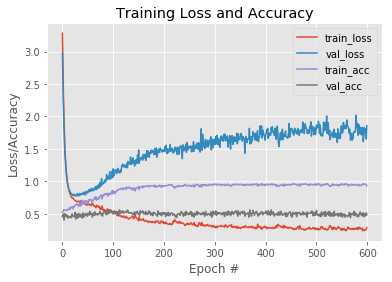

In [251]:
n_epoch=600
twitter_model = vizModelMetric(evaluateModelAndTestAccuracy(DenseNetwork(featureLength),train, train_y, test, test_y ,n_epoch),n_epoch)

In [254]:
filename = 'twitter_model.h5'
twitter_model.save(filename)

# Ensemble Tw, News and FI 

In [83]:
import pandas as pd

In [223]:
getStartEndDateShape(_ens_FI_Scaled_FE)
getStartEndDateShape(_ens_News_NonScaled_FE)
getStartEndDateShape(_ens_Twitter_BERT)

startDate 2015-05-04 00:00:00
endDate 2019-03-28 00:00:00
shape (983, 31)
---------------------------
startDate 2015-05-04 00:00:00
endDate 2019-03-28 00:00:00
shape (1027, 24)
---------------------------
startDate 2015-05-04 00:00:00
endDate 2019-03-28 00:00:00
shape (1419, 770)
---------------------------


In [216]:
targtWithDateForJoin =pd.DataFrame()
targtWithDateForJoin['date'] = _ens_FI_Scaled_FE.date.tolist()
targtWithDateForJoin['target'] = _ens_FI_Scaled_FE.target.tolist()

In [224]:
_ens_FI_Scaled_FE.drop(['target'],axis=1,inplace= True)
_ens_News_NonScaled_FE.drop(['target'],axis=1,inplace= True)
_ens_Twitter_BERT.drop(['Target'],axis=1,inplace= True)

In [225]:
result =pd.merge( targtWithDateForJoin,_ens_FI_Scaled_FE, how='inner', on='date')
result =pd.merge( result,_ens_News_NonScaled_FE, how='inner', on='date')
result =pd.merge( result,_ens_Twitter_BERT, how='inner', on='date')

In [226]:
result.sort_values(by='date',inplace=True) 
result['target'] = result['target'].ffill()
result.fillna(0,inplace=True)
result.drop(['open'],axis=1,inplace =True)

In [276]:
result= createComparableDataset(result)

getStartEndDateShape(result)
train, train_y,test, test_y = prepareDataSet(result)
print('train',train.shape,'test',test.shape,'train_y',len(train_y),'test_y',len(test_y))

startDate 2015-05-04 00:00:00
endDate 2019-03-28 00:00:00
shape (838, 822)
---------------------------
train (782, 820) test (56, 820) train_y 782 test_y 56


In [228]:
col_names =  ['news', 'tweeter', 'financialIndicator','target']
YHat_train  = pd.DataFrame(columns = col_names)
YHat_test = pd.DataFrame(columns = col_names)
YHat_test['target'] = test_y
YHat_train['target'] = train_y

In [231]:
train_nwDf= train[[ 'lm_positive', 'lm_negative', 'lm_polarity', 'passive', 'weak',
       'strong', 'anger', 'joy', 'suprise', 'sadness', 'disgust',
       'anticipation', 'fear', 'trust', 'tb_polarity', 'hiv4_polarity']]
test_nwDf= test[['lm_positive', 'lm_negative', 'lm_polarity', 'passive', 'weak',
       'strong', 'anger', 'joy', 'suprise', 'sadness', 'disgust',
       'anticipation', 'fear', 'trust', 'tb_polarity', 'hiv4_polarity']]

In [232]:
train_fiDf= train[[ 'Volume', 'sma2_increment', 'sma2_1_increment', 'vol_increment',
       'vol_rel_increment', 'open_incr', 'MACD', 'fft', 'absolute' ]]
test_fiDf= test[[ 'Volume', 'sma2_increment', 'sma2_1_increment', 'vol_increment',
       'vol_rel_increment', 'open_incr', 'MACD', 'fft', 'absolute']]

In [233]:
train_twDf= train[[ '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '313', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '364', '365', '366', '367', '368', '369', '370', '371', '372', '373', '374', '375', '376', '377', '378', '379', '380', '381', '382', '383', '384', '385', '386', '387', '388', '389', '390', '391', '392', '393', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '440', '441', '442', '443', '444', '445', '446', '447', '448', '449', '450', '451', '452', '453', '454', '455', '456', '457', '458', '459', '460', '461', '462', '463', '464', '465', '466', '467', '468', '469', '470', '471', '472', '473', '474', '475', '476', '477', '478', '479', '480', '481', '482', '483', '484', '485', '486', '487', '488', '489', '490', '491', '492', '493', '494', '495', '496', '497', '498', '499', '500', '501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517', '518', '519', '520', '521', '522', '523', '524', '525', '526', '527', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538', '539', '540', '541', '542', '543', '544', '545', '546', '547', '548', '549', '550', '551', '552', '553', '554', '555', '556', '557', '558', '559', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572', '573', '574', '575', '576', '577', '578', '579', '580', '581', '582', '583', '584', '585', '586', '587', '588', '589', '590', '591', '592', '593', '594', '595', '596', '597', '598', '599', '600', '601', '602', '603', '604', '605', '606', '607', '608', '609', '610', '611', '612', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', '624', '625', '626', '627', '628', '629', '630', '631', '632', '633', '634', '635', '636', '637', '638', '639', '640', '641', '642', '643', '644', '645', '646', '647', '648', '649', '650', '651', '652', '653', '654', '655', '656', '657', '658', '659', '660', '661', '662', '663', '664', '665', '666', '667', '668', '669', '670', '671', '672', '673', '674', '675', '676', '677', '678', '679', '680', '681', '682', '683', '684', '685', '686', '687', '688', '689', '690', '691', '692', '693', '694', '695', '696', '697', '698', '699', '700', '701', '702', '703', '704', '705', '706', '707', '708', '709', '710', '711', '712', '713', '714', '715', '716', '717', '718', '719', '720', '721', '722', '723', '724', '725', '726', '727', '728', '729', '730', '731', '732', '733', '734', '735', '736', '737', '738', '739', '740', '741', '742', '743', '744', '745', '746', '747', '748', '749', '750', '751', '752', '753', '754', '755', '756', '757', '758', '759', '760', '761', '762', '763', '764', '765', '766', '767']]
test_twDf= test[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '313', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '364', '365', '366', '367', '368', '369', '370', '371', '372', '373', '374', '375', '376', '377', '378', '379', '380', '381', '382', '383', '384', '385', '386', '387', '388', '389', '390', '391', '392', '393', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '440', '441', '442', '443', '444', '445', '446', '447', '448', '449', '450', '451', '452', '453', '454', '455', '456', '457', '458', '459', '460', '461', '462', '463', '464', '465', '466', '467', '468', '469', '470', '471', '472', '473', '474', '475', '476', '477', '478', '479', '480', '481', '482', '483', '484', '485', '486', '487', '488', '489', '490', '491', '492', '493', '494', '495', '496', '497', '498', '499', '500', '501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517', '518', '519', '520', '521', '522', '523', '524', '525', '526', '527', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538', '539', '540', '541', '542', '543', '544', '545', '546', '547', '548', '549', '550', '551', '552', '553', '554', '555', '556', '557', '558', '559', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572', '573', '574', '575', '576', '577', '578', '579', '580', '581', '582', '583', '584', '585', '586', '587', '588', '589', '590', '591', '592', '593', '594', '595', '596', '597', '598', '599', '600', '601', '602', '603', '604', '605', '606', '607', '608', '609', '610', '611', '612', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', '624', '625', '626', '627', '628', '629', '630', '631', '632', '633', '634', '635', '636', '637', '638', '639', '640', '641', '642', '643', '644', '645', '646', '647', '648', '649', '650', '651', '652', '653', '654', '655', '656', '657', '658', '659', '660', '661', '662', '663', '664', '665', '666', '667', '668', '669', '670', '671', '672', '673', '674', '675', '676', '677', '678', '679', '680', '681', '682', '683', '684', '685', '686', '687', '688', '689', '690', '691', '692', '693', '694', '695', '696', '697', '698', '699', '700', '701', '702', '703', '704', '705', '706', '707', '708', '709', '710', '711', '712', '713', '714', '715', '716', '717', '718', '719', '720', '721', '722', '723', '724', '725', '726', '727', '728', '729', '730', '731', '732', '733', '734', '735', '736', '737', '738', '739', '740', '741', '742', '743', '744', '745', '746', '747', '748', '749', '750', '751', '752', '753', '754', '755', '756', '757', '758', '759', '760', '761', '762', '763', '764', '765', '766', '767']]

In [362]:
YHat_test['news'] = news_model.predict(test_nwDf)  
YHat_train['news'] = news_model.predict(train_nwDf)

In [363]:
accuracy_score(news_model.predict(test_nwDf) ,test_y)

0.6428571428571429

In [364]:
YHat_test['tweeter'] = twitter_model.predict(test_twDf) 
YHat_train['tweeter'] = twitter_model.predict(train_twDf).round() 

In [365]:
accuracy_score(twitter_model.predict(test_twDf).round() ,test_y)

0.5714285714285714

In [366]:
# train_fiDf.head(2)
scale = StandardScaler()
train_fiDf = pd.DataFrame(scale.fit_transform(train_fiDf.values), columns=train_fi.columns)
scale = StandardScaler()
test_fiDf = pd.DataFrame(scale.fit_transform(test_fiDf.values), columns=test_fi.columns)

In [367]:
YHat_test['financialIndicator'] = fi_model.predict(test_fiDf)
YHat_train['financialIndicator'] = fi_model.predict(train_fiDf)

In [368]:
accuracy_score(fi_model.predict(test_fiDf),test_y)

0.7678571428571429

In [369]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC

In [387]:
classifiers = [
    ('logisticregression', LogisticRegression()),
    ('randomForest', RandomForestClassifier(n_estimators=5000, max_depth=4,random_state=0)),
    ('svc', SVC(gamma='auto')),
]
clf = VotingClassifier(classifiers, n_jobs=-1)

In [388]:
clf.fit(YHat_train.drop(['target'],axis=1),train_y)

VotingClassifier(estimators=[('sgd', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=6000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
   ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=-1, voting='hard', weights=None)

In [389]:
y_pred = clf.predict(YHat_test.drop(['target'],axis=1))
print('accuracy_score',accuracy_score(y_pred, test_y))
print('classification_score\n',classification_report(y_pred, test_y))

accuracy_score 0.5714285714285714
classification_score
               precision    recall  f1-score   support

           0       0.33      0.50      0.40        16
           1       0.75      0.60      0.67        40

   micro avg       0.57      0.57      0.57        56
   macro avg       0.54      0.55      0.53        56
weighted avg       0.63      0.57      0.59        56

